<a href="https://colab.research.google.com/github/gairikzzz/datasciencecoursera/blob/master/Dummy_data_and_ML_(Saturated_Sandstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing some important libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Defining python functions to creat dummy datas between values when provided the listed arguments

def conf_pressure(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vp_ninety(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vp_fourfive(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vp_zero(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsv_ninety(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsv_fourfive(mode, max, min, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsv_zero(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsh_ninety(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsh_fourfive(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

def Vsh_zero(mode, min, max, n):
  np.random.seed(10)
  return(np.random.triangular(min, mode, max, n))

In [ ]:
#Inputing the real values of the listed parameters like minimum, maximum, mode and the number to dummy data to be generated

Vp_ninety_1 = Vp_ninety(3449.33, 3230, 3625, 100)
pressure = conf_pressure(20.7, 6.7, 40.2, 100)
Vp_fourfive_1 = Vp_fourfive(3362.167, 3007, 3581, 100)
vp_zero_1 = Vp_zero(3424.167, 3036, 3592, 100)
vsv_ninety_1 = Vsv_ninety(1798.33, 1662, 1922, 100)
vsv_fourfive_1 = Vsv_fourfive(1528.5, 1600, 1449, 100)
vsv_zero_1 = Vsv_zero(1451.833, 1410, 1498, 100)
vsh_ninety_1 = Vsh_ninety(1996.33, 1882, 2148, 100)
vsh_fourfive_1 = Vsh_fourfive(1815.1677, 1604, 1997, 100)
vsh_zero_1 = Vsh_zero(1914.167, 1781, 1986, 100)

In [ ]:
#Creating a variable to store the dummy data generated

Pressure_up = np.concatenate([pressure], axis=0)
Vp_ninety_up = np.concatenate([Vp_ninety_1], axis=0)
Vp_fourfive_up = np.concatenate([Vp_fourfive_1], axis=0)
Vp_zero_up = np.concatenate([vp_zero_1], axis=0)
vsv_ninety_up = np.concatenate([vsv_ninety_1], axis=0)
vsv_fourfive_up = np.concatenate([vsv_fourfive_1], axis=0)
vsv_zero_up = np.concatenate([vsv_zero_1], axis=0)
vsh_ninety_up = np.concatenate([vsh_ninety_1], axis=0)
vsh_fourfive_up = np.concatenate([vsh_fourfive_1], axis=0)
vsh_zero_up = np.concatenate([vsh_zero_1], axis=0)

In [ ]:
#Creating a pandas dataframe which makes it easy to process and further evaluate

df = pd.DataFrame({'Confining Pressure(Mpa)': Pressure_up, 'Vp(90)': Vp_ninety_up, 'Vp(45)': Vp_fourfive_up, 
                         'Vp(0)': Vp_zero_up, 'Vsh(90)': vsh_ninety_up, 'Vsh(45)': vsh_fourfive_up,
                         'Vsh(0)': vsh_zero_up, 'Vsv(90)': vsv_ninety_up, 'Vsv(45)': vsv_fourfive_up, 'Vsv(0)': vsv_zero_up})
df.head()

,Confining Pressure(Mpa),Vp(90),Vp(45),Vp(0),Vsh(90),Vsh(45),Vsh(0),Vsv(90),Vsv(45),Vsv(0)
0,27.977693,3499.031827,3411.517120,3445.920405,2051.948502,1869.166326,1927.970021,1836.250354,1550.311604,1467.519601
1,9.819722,3272.401090,3072.043170,3102.923116,1907.121778,1645.499176,1804.801520,1689.121384,1464.783434,1418.740380
2,24.730052,3465.560291,3366.483107,3405.803329,2026.426252,1835.199099,1912.522287,1813.465453,1537.108690,1459.420526
3,27.390087,3492.975719,3403.368978,3438.897411,2047.330683,1863.020531,1925.180143,1832.127812,1547.922760,1466.054211
4,22.100268,3437.818020,3325.792346,3364.006415,2005.759558,1807.397521,1897.657019,1794.928476,1526.358435,1452.862282


In [ ]:
#saving the dummy dataset generated to excel file for calculation of the thompson parameter values

df.to_excel('Dummy data project (Saturated Sandstone).xlsx', sheet_name = 'New_sheet')

In [ ]:
#This csv file has all the thompson parameter values calculated in excel after which it is loaded in this notebook for further processing and modelling.

df_updated = pd.read_csv('/content/Dummy data project ML (Saturated Sandstone).csv')
df_updated.head()

,Unnamed: 0,Confining Pressure(Mpa),Vp(90),Vp(45),Vp(0),Vsh(90),Vsh(45),Vsh(0),Vsv(90),Vsv(45),Vsv(0),C11 (Mpa),C33 (Mpa),C44 (Mpa),C66 (Mpa),C13 (Mpa),k=C33-(4/3) C44,C12 (Mpa),K (Bulk Modulus) Mpa,E1 Horizontal Young Modulus (Mpa),E3 vertical Yong's Madulus (Mpa),V31,V12,V13
0,1,6.700000,3230.000000,3007.000000,3036.000000,1882.000000,1604.000000,1781.000000,1662.000000,1600.000000,1410.000000,2.514329,2.221368,0.665701,0.853604,0.650894,1.333767,0.807122,1.265517,2.602843,1.966261,0.195967,0.265277,0.215285
1,2,8.060785,3248.494849,3035.371054,3065.191064,1892.957819,1622.101445,1791.381939,1673.830024,1455.884545,1413.812449,2.543205,2.264290,0.675211,0.863573,0.679567,1.364009,0.816060,1.292703,2.595209,1.989343,0.202296,0.261667,0.221591
2,3,9.819722,3272.401090,3072.043170,3102.923116,1907.121778,1645.499176,1804.801520,1689.121384,1464.783434,1418.740380,2.580775,2.320380,0.687605,0.876544,0.717043,1.403574,0.827686,1.328037,2.584537,2.018689,0.210371,0.256912,0.229629
3,4,10.151449,3276.909690,3078.959352,3110.039196,1909.793031,1649.911873,1807.332387,1692.005259,1466.461721,1419.669763,2.587891,2.331035,0.689955,0.879002,0.724164,1.411096,0.829888,1.334724,2.582429,2.024161,0.211881,0.256004,0.231131
4,5,10.992220,3288.336864,3096.488609,3128.075102,1916.563398,1661.095980,1813.746942,1699.314524,1470.715386,1422.025312,2.605971,2.358150,0.695928,0.885245,0.742287,1.430245,0.835482,1.351709,2.576960,2.037942,0.215690,0.253688,0.234921


In [ ]:
df_updated.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_updated.describe().T

,count,mean,std,min,25%,50%,75%,max
Confining Pressure(Mpa),102.0,22.157784,6.881034,6.700000,18.434243,22.069117,26.674829,40.200000
Vp(90),102.0,3430.638023,81.430359,3230.000000,3389.483666,3437.456960,3485.603972,3625.000000
Vp(45),102.0,3310.853832,119.493603,3007.000000,3251.647563,3325.238480,3393.450719,3581.000000
Vp(0),102.0,3345.088949,117.909885,3036.000000,3287.718622,3363.436540,3430.348729,3592.000000
Vsh(90),102.0,2005.812291,54.601379,1882.000000,1976.490808,2005.514750,2041.709681,2148.000000
Vsh(45),102.0,1801.236916,80.867286,1604.000000,1760.091288,1807.044141,1855.539613,1997.000000
Vsh(0),102.0,1891.641361,42.951127,1781.000000,1870.524908,1897.454341,1921.784188,1986.000000
Vsv(90),102.0,1791.345320,53.441566,1662.000000,1764.011947,1794.697528,1827.109682,1922.000000
Vsv(45),102.0,1524.229414,31.042360,1449.000000,1508.366396,1526.224033,1545.014960,1600.000000
Vsv(0),102.0,1451.583397,17.693686,1410.000000,1442.792263,1452.264614,1463.522129,1490.909589


In [ ]:
df_updated.isna().sum()

Confining Pressure(Mpa)              0
Vp(90)                               0
Vp(45)                               0
Vp(0)                                0
Vsh(90)                              0
Vsh(45)                              0
Vsh(0)                               0
Vsv(90)                              0
Vsv(45)                              0
Vsv(0)                               0
C11 (Mpa)                            0
C33 (Mpa)                            0
C44 (Mpa)                            0
C66 (Mpa)                            0
C13 (Mpa)                            0
k=C33-(4/3) C44                      0
C12 (Mpa)                            0
K (Bulk Modulus) Mpa                 0
E1 Horizontal Young Modulus (Mpa)    0
E3 vertical Yong's Madulus (Mpa)     0
V31                                  0
V12                                  0
V13                                  0
dtype: int64

In [ ]:
df = df_updated[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', 'K (Bulk Modulus) Mpa', 'E1 Horizontal Young Modulus (Mpa)', "E3 vertical Yong's Madulus (Mpa)", 'V31', 'V12', 'V13']]

In [ ]:
df_updated_1 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', 'K (Bulk Modulus) Mpa']]
df_updated_2 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', 'E1 Horizontal Young Modulus (Mpa)']]
df_updated_3 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', "E3 vertical Yong's Madulus (Mpa)"]]
df_updated_4 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', "V31"]]
df_updated_5 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', "V12"]]
df_updated_6 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)', "V13"]]

In [ ]:
df_updated_1.head()

,Confining Pressure(Mpa),Vp(90),Vp(45),Vp(0),Vsh(90),Vsh(45),Vsh(0),Vsv(90),Vsv(45),Vsv(0),K (Bulk Modulus) Mpa
0,6.700000,3230.000000,3007.000000,3036.000000,1882.000000,1604.000000,1781.000000,1662.000000,1600.000000,1410.000000,1.265517
1,8.060785,3248.494849,3035.371054,3065.191064,1892.957819,1622.101445,1791.381939,1673.830024,1455.884545,1413.812449,1.292703
2,9.819722,3272.401090,3072.043170,3102.923116,1907.121778,1645.499176,1804.801520,1689.121384,1464.783434,1418.740380,1.328037
3,10.151449,3276.909690,3078.959352,3110.039196,1909.793031,1649.911873,1807.332387,1692.005259,1466.461721,1419.669763,1.334724
4,10.992220,3288.336864,3096.488609,3128.075102,1916.563398,1661.095980,1813.746942,1699.314524,1470.715386,1422.025312,1.351709


# **Some basic visualization**

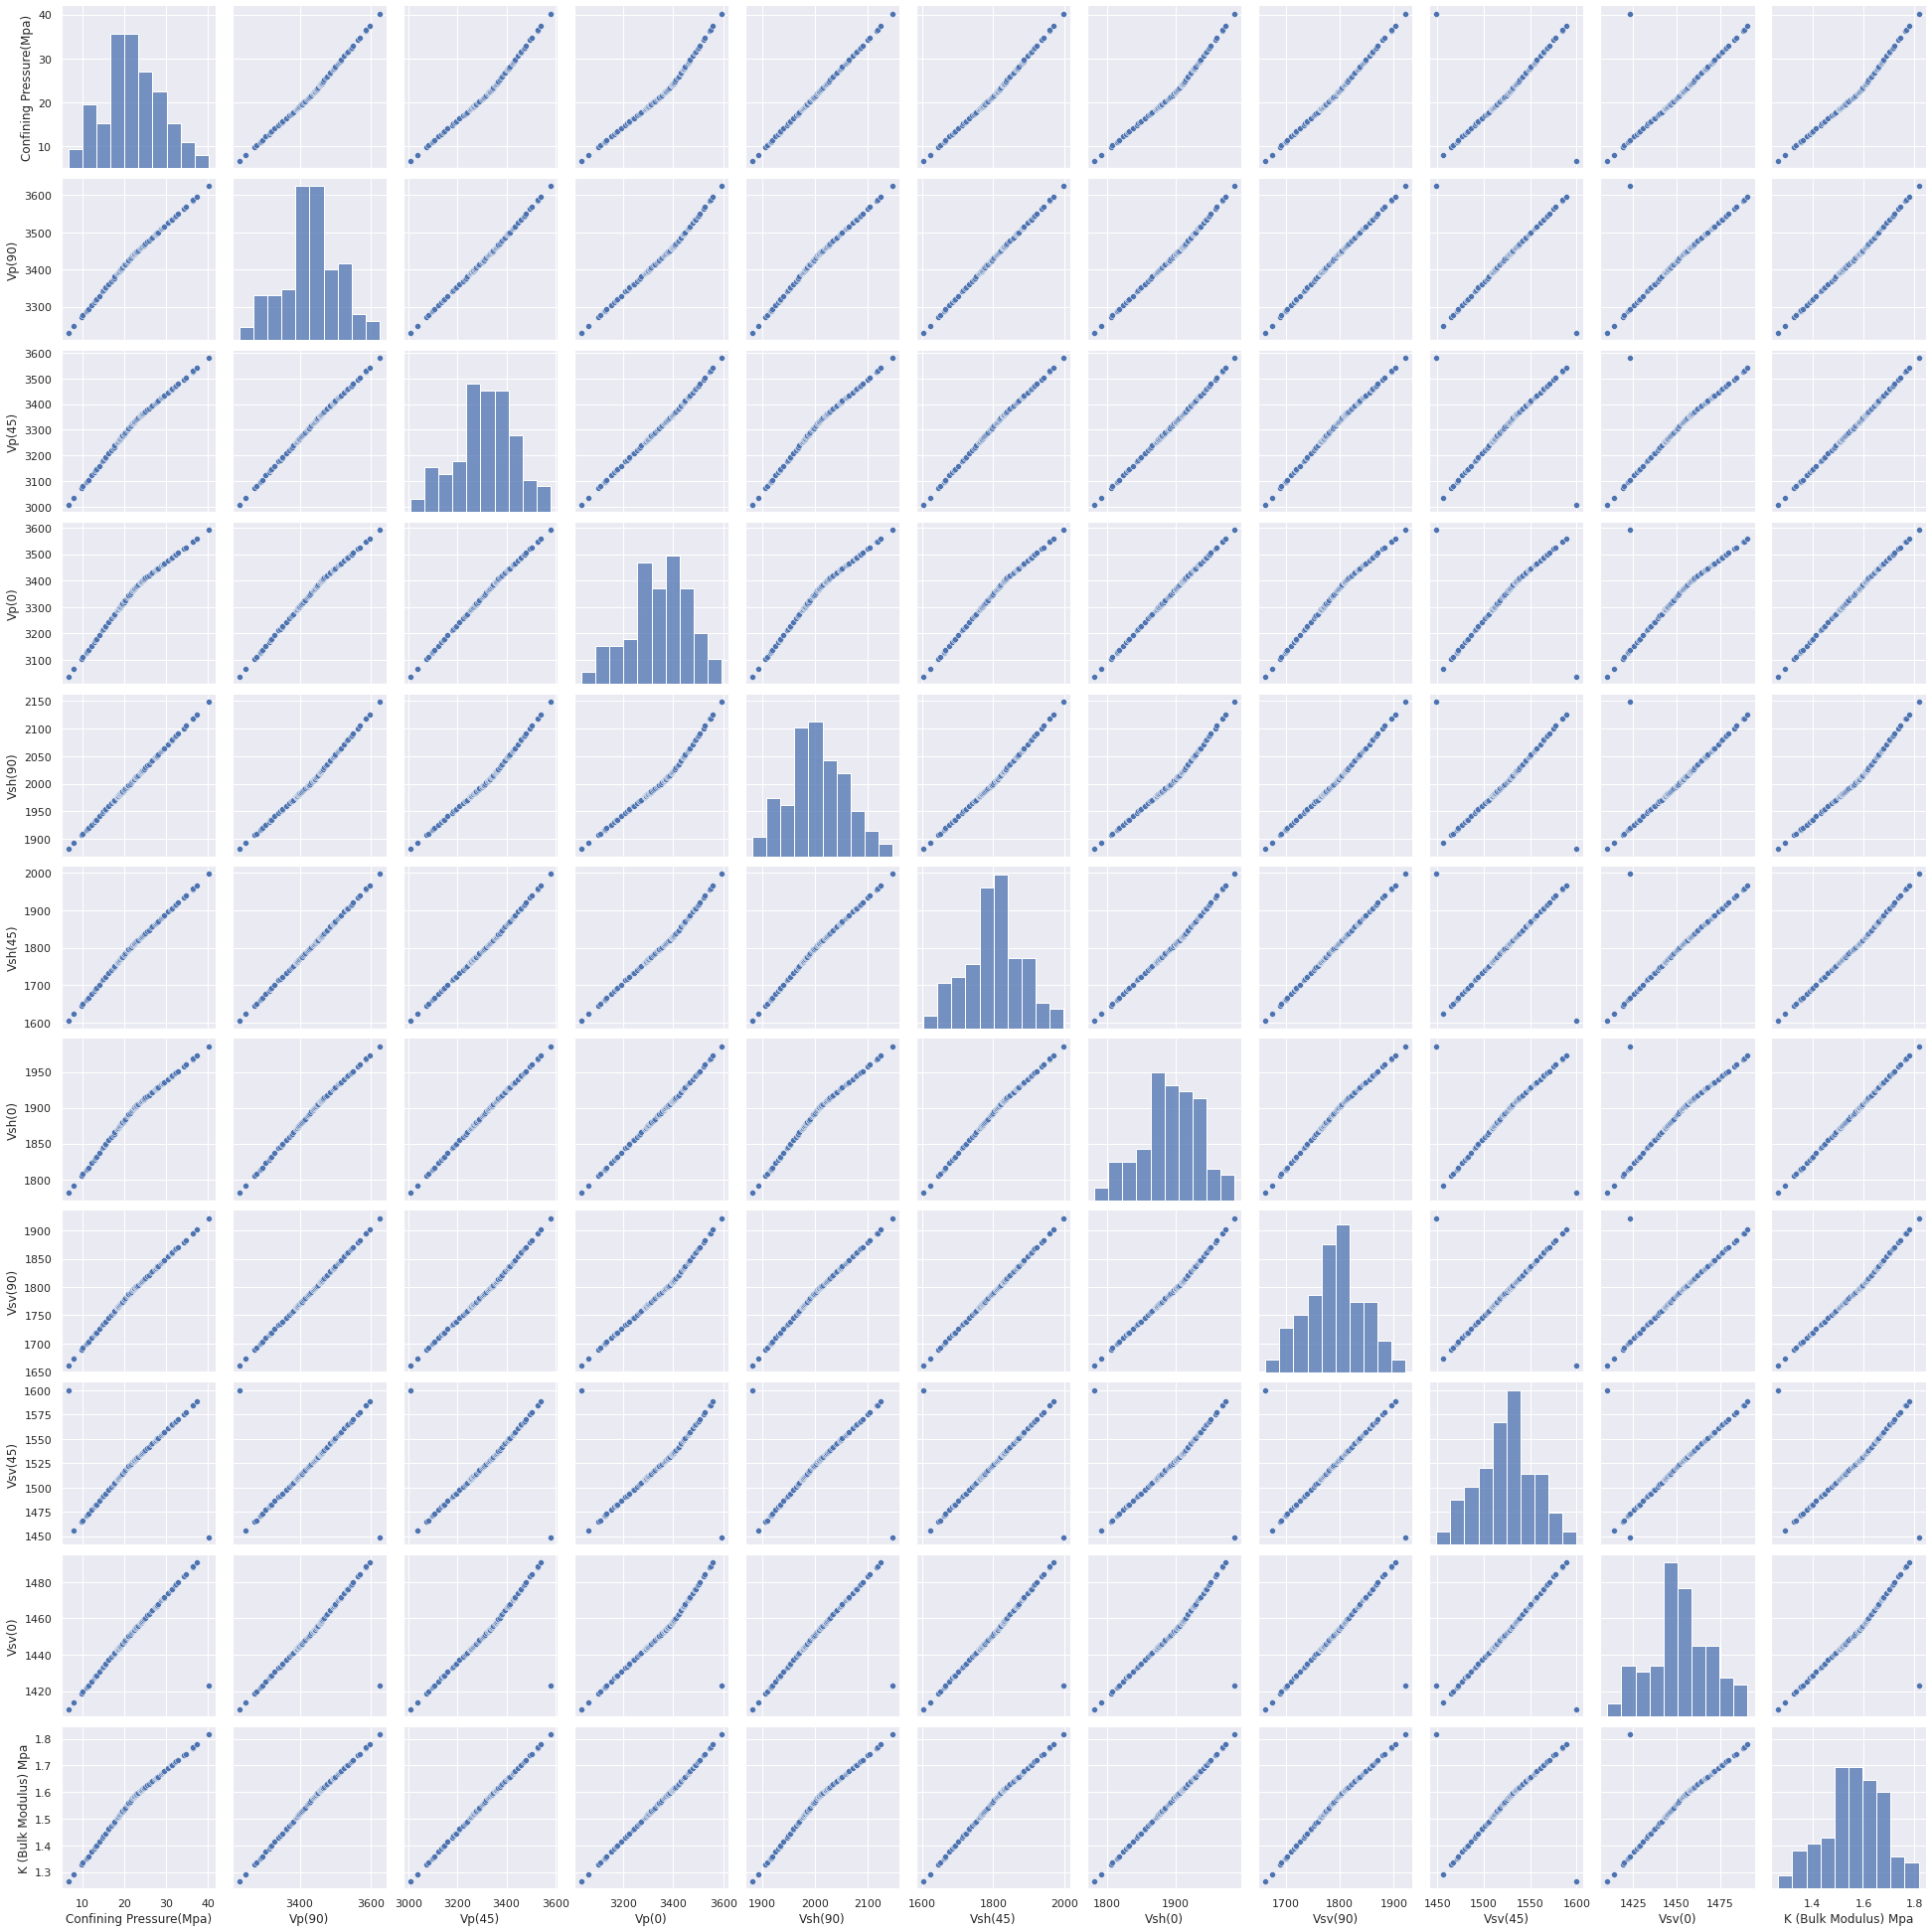

In [ ]:
sns.pairplot(df_updated_1)

In [ ]:
feature_names = ['K (Bulk Modulus) Mpa', 'E1 Horizontal Young Modulus (Mpa)', "E3 vertical Yong's Madulus (Mpa)", 'V31', 'V12', 'V13']

In [ ]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")

    fig.tight_layout()  
    plt.show()

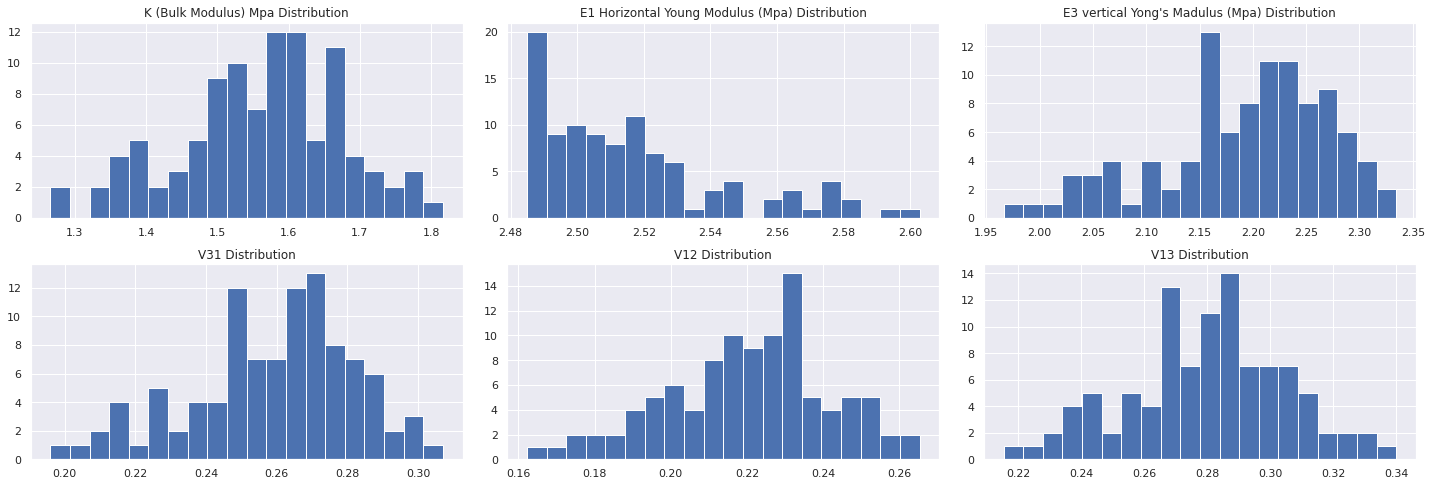

In [ ]:
histograms_plot(df, feature_names, 6, 3)

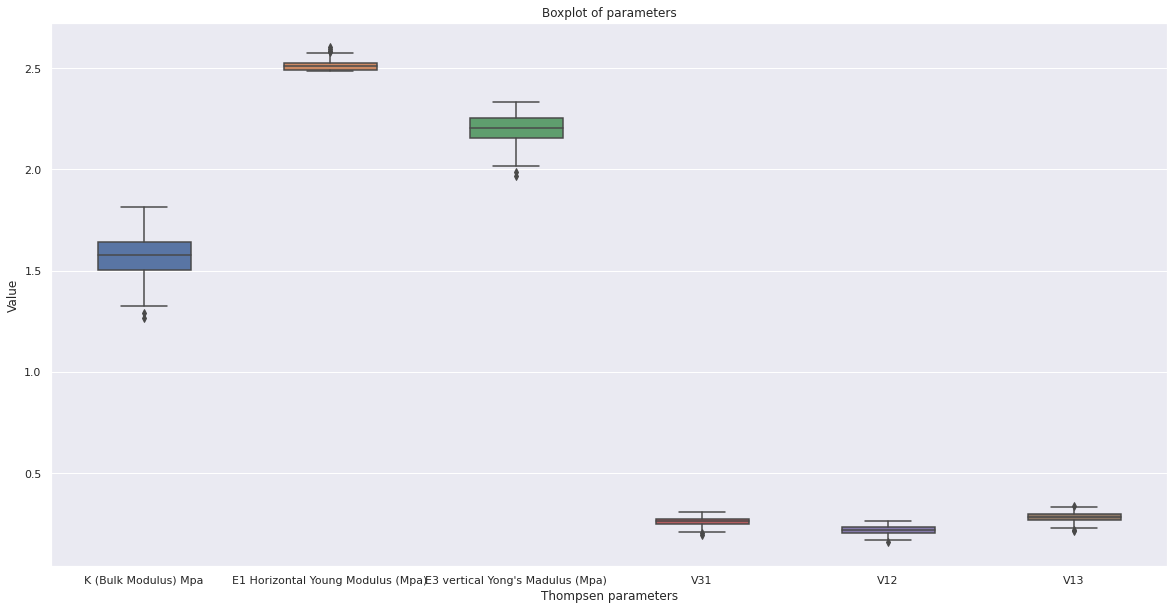

In [ ]:
df_sec_boxplot = pd.melt(df[['K (Bulk Modulus) Mpa', 'E1 Horizontal Young Modulus (Mpa)', "E3 vertical Yong's Madulus (Mpa)", 'V31', 'V12', 'V13']])

plt.figure(figsize=(20,10))
ax = sns.boxplot(x=df_sec_boxplot["variable"], y=df_sec_boxplot["value"], showfliers = True, width=0.5)
ax.set(xlabel='Thompsen parameters', ylabel='Value')
ax.set_title("Boxplot of parameters")
plt.show()

# **In case if we reqire some outlier removal**

In [ ]:
import operator

def outlier_removal(df, op, limit, replace):
    temp_name = df.name
    print('Before outlier removal for',df.name)
    print(df.name,'Min',min(df[df.notnull()]))
    print(df.name,'Max',max(df[df.notnull()]))
    outliers = [x for x in df if op(x,limit)]
    print('Number of',df.name,'outliers:',len(outliers),'\n')
    
    df = np.where((op(df,limit)), replace, df)
    df = pd.Series(df)
    print('After outlier removal for',temp_name)
    print(temp_name,'Min',min(df[df.notnull()]))
    print(temp_name,'Max',max(df[df.notnull()]))
    
    return df

In [ ]:
df_for_corr = df.iloc[:,0:-1]
corr = df_for_corr.corr()
corr

,Confining Pressure(Mpa),Vp(90),Vp(45),Vp(0),Vsh(90),Vsh(45),Vsh(0),Vsv(90),Vsv(45),Vsv(0),K (Bulk Modulus) Mpa,E1 Horizontal Young Modulus (Mpa),E3 vertical Yong's Madulus (Mpa),V31,V12
Confining Pressure(Mpa),1.000000,0.996499,0.992747,0.986849,0.999974,0.997341,0.990572,0.997882,0.763324,0.909403,0.990680,-0.605149,0.975125,0.983572,-0.999473
Vp(90),0.996499,1.000000,0.999301,0.996781,0.997074,0.999941,0.998505,0.999824,0.766227,0.918691,0.998568,-0.667984,0.989838,0.995179,-0.993510
Vp(45),0.992747,0.999301,1.000000,0.999071,0.993577,0.998837,0.999849,0.998427,0.767150,0.921434,0.999862,-0.695290,0.994343,0.998118,-0.988730
Vp(0),0.986849,0.996781,0.999071,1.000000,0.987957,0.995863,0.999667,0.995125,0.768147,0.923816,0.999586,-0.725164,0.997909,0.999682,-0.981674
Vsh(90),0.999974,0.997074,0.993577,0.987957,1.000000,0.997840,0.991516,0.998326,0.763622,0.910389,0.991622,-0.610562,0.976637,0.984832,-0.999227
Vsh(45),0.997341,0.999941,0.998837,0.995863,0.997840,1.000000,0.997857,0.999969,0.765922,0.917745,0.997930,-0.659914,0.988289,0.994059,-0.994658
Vsh(0),0.990572,0.998505,0.999849,0.999667,0.991516,0.997857,1.000000,0.997313,0.767538,0.922470,0.999979,-0.707563,0.995989,0.998985,-0.986087
Vsv(90),0.997882,0.999824,0.998427,0.995125,0.998326,0.999969,0.997313,1.000000,0.765687,0.917011,0.997392,-0.654011,0.987094,0.993169,-0.995424
Vsv(45),0.763324,0.766227,0.767150,0.768147,0.763622,0.765922,0.767538,0.765687,1.000000,0.881750,0.767049,-0.546149,0.765846,0.762703,-0.762135
Vsv(0),0.909403,0.918691,0.921434,0.923816,0.910389,0.917745,0.922470,0.917011,0.881750,1.000000,0.921489,-0.675532,0.926406,0.922342,-0.903452


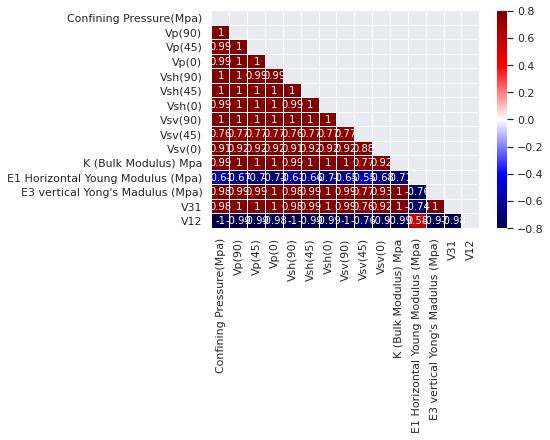

In [ ]:
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

fig = plt.gcf()

# Heatmap with pearson correlation values

sns.heatmap(corr, annot=True, vmin=-0.8, vmax=0.8, cmap='seismic', mask=mask, linewidths=0.1)

# **Fitting model using OLS(ordinary least squares) method**

In [ ]:
X_1 = df[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_1 = df['K (Bulk Modulus) Mpa']

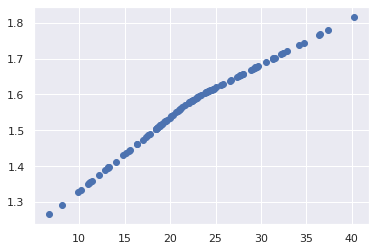

In [ ]:
plt.scatter(X_1['Confining Pressure(Mpa)'], y_1)

In [ ]:
x = sm.add_constant(X_1)
result = sm.OLS(y_1,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     K (Bulk Modulus) Mpa   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 2.167e+06
Date:                  Mon, 29 Mar 2021   Prob (F-statistic):          5.03e-240
Time:                          06:44:53   Log-Likelihood:                 707.58
No. Observations:                   102   AIC:                            -1393.
Df Residuals:                        91   BIC:                            -1364.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4918      9.439      0.052      0.959     -18.258      19.242
Confining Pressure(Mpa)     0.0674      0.013      5.077      0.000       0.041       0.094
Vp(90)                      0.0038      0.004      0.992      0.324      -0.004       0.011
Vp(45)                      0.0005      0.001      0.544      0.588      -0.001       0.002
Vp(0)                      -0.0007      0.000     -3.983      0.000      -0.001      -0.000
Vsh(90)                    -0.0103      0.002     -4.807      0.000      -0.015      -0.006
Vsh(45)                    -0.0098      0.008     -1.238      0.219      -0.025       0.006
Vsh(0)                      0.0034      0.002      1.612      0.110      -0.001       0.007
Vsv(90)                     0.0106      0.007      1.446      0.152      -0.004       0.025
Vsv(45)                  1.279e-05    1.8e-06      7.090      0.000    9.21e-06    1.64e-05
Vsv(0)                  -3.847e-05   5.33e-06     -7.223      0.000    -4.9e-05   -2.79e-05
==============================================================================
Omnibus:                       44.357   Durbin-Watson:                   0.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.949
Skew:                           1.379   Prob(JB):                     2.28e-39
Kurtosis:                       8.854   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

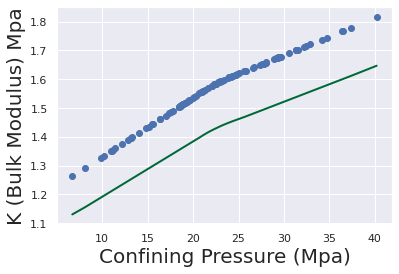

In [ ]:
plt.scatter(df['Confining Pressure(Mpa)'], y_1, cmap='RdYlGn_r')

yhat = 0.4918 + (0.0674*df_updated_1['Confining Pressure(Mpa)']) + (0.0038*df_updated_1['Vp(90)']) + (0.0005*df_updated_1['Vp(45)']) - (0.0007*df_updated_1['Vp(0)']) - (0.0103*df_updated_1['Vsh(90)']) - (0.0098*df_updated_1['Vsh(45)']) + (0.0034*df_updated_1['Vsh(0)']) + (0.0106*df_updated_1['Vsv(90)']) + (1.279e-05*df_updated_1['Vsv(45)']) - (3.847e-05*df_updated_1['Vsv(0)'])

fig = plt.plot(df_updated_1['Confining Pressure(Mpa)'], yhat, lw=2, c='#006837')
plt.xlabel('Confining Pressure (Mpa)', fontsize=20)
plt.ylabel('K (Bulk Modulus) Mpa', fontsize=20)
plt.show()

# **Model using Random forests and decision tree**

***This model is for prediction of K (Bulk modulus) Mpa***

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.030886165223031836
0.9228269500781897
0.03814079175044659
0.9089707465888545


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.03283050557175517
0.9128047504752268
0.04042092584112033
0.8977615901546596


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.0031134448935368994
0.9992158122566309
0.007682119883647551
0.9963071324352848


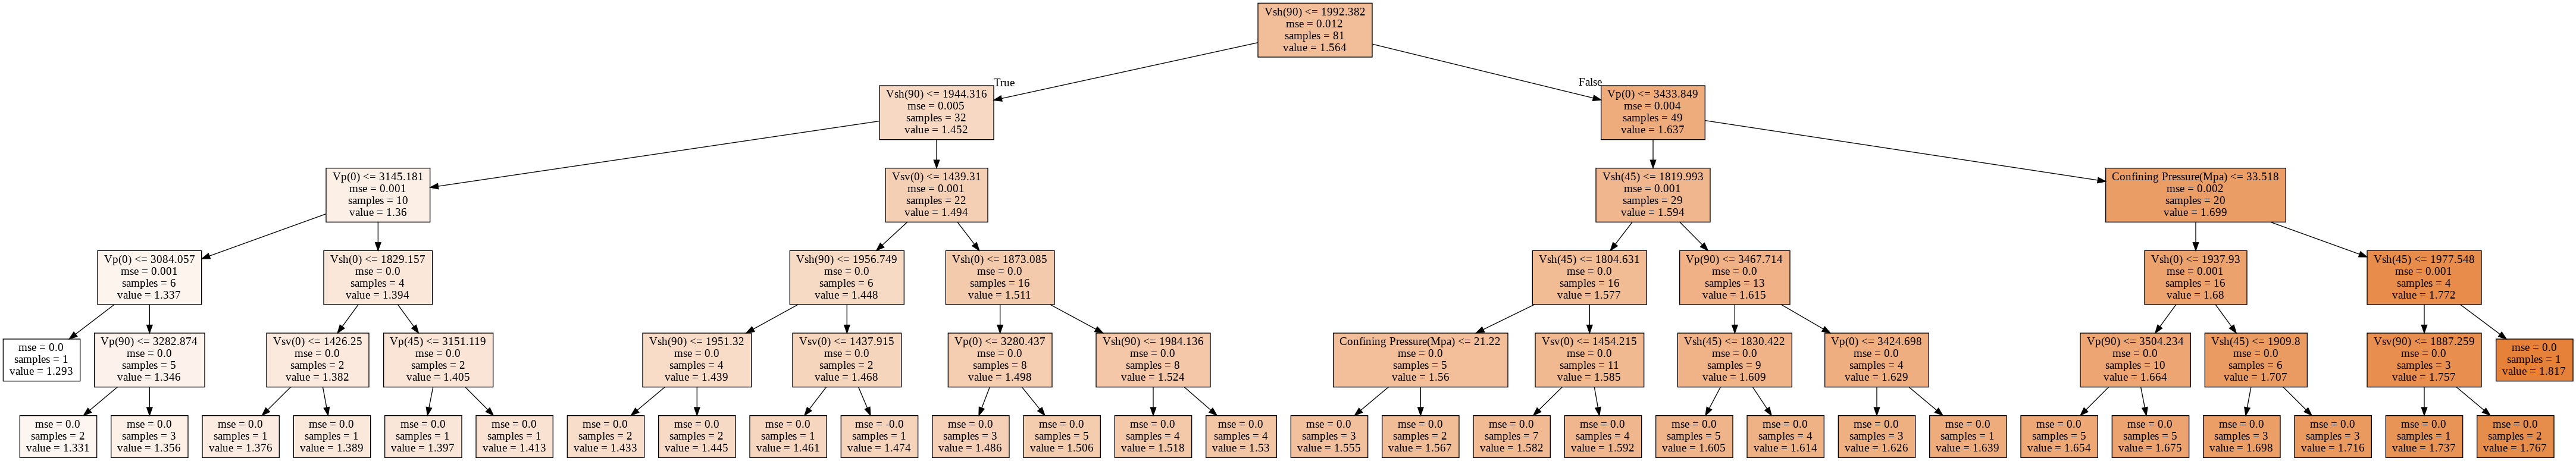

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.006125047940873906
0.9969650141679841
0.017131408758136384
0.981635135533232


***Prediction of E1 Horizontal Young Modulus (Mpa)***

In [ ]:
X_2 = df_updated_2[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_2 = df_updated_2['E1 Horizontal Young Modulus (Mpa)']

In [ ]:
x = sm.add_constant(X_2)
result = sm.OLS(y_2,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     E1 Horizontal Young Modulus (Mpa)   R-squared:                       0.999
Model:                                           OLS   Adj. R-squared:                  0.999
Method:                                Least Squares   F-statistic:                 1.199e+04
Date:                               Mon, 29 Mar 2021   Prob (F-statistic):          2.41e-137
Time:                                       07:27:25   Log-Likelihood:                 584.35
No. Observations:                                102   AIC:                            -1147.
Df Residuals:                                     91   BIC:                            -1118.
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3934     31.598     -0.076      0.940     -65.159      60.372
Confining Pressure(Mpa)    -0.1988      0.044     -4.471      0.000      -0.287      -0.110
Vp(90)                     -0.0077      0.013     -0.597      0.552      -0.033       0.018
Vp(45)                      0.0013      0.003      0.408      0.684      -0.005       0.008
Vp(0)                       0.0013      0.001      2.287      0.024       0.000       0.002
Vsh(90)                     0.0302      0.007      4.190      0.000       0.016       0.044
Vsh(45)                     0.0303      0.026      1.147      0.254      -0.022       0.083
Vsh(0)                     -0.0148      0.007     -2.124      0.036      -0.029      -0.001
Vsv(90)                    -0.0336      0.025     -1.362      0.176      -0.083       0.015
Vsv(45)                 -4.392e-05   6.04e-06     -7.272      0.000   -5.59e-05   -3.19e-05
Vsv(0)                      0.0001   1.78e-05      8.241      0.000       0.000       0.000
==============================================================================
Omnibus:                       44.426   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.621
Skew:                          -1.416   Prob(JB):                     1.09e-36
Kurtosis:                       8.563   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.009716220039605332
0.8793664965957975
0.020133062579465174
0.5511847366333735


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.010111749359951258
0.8693450554434493
0.013237787079164814
0.8059656080126624


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.0018791066893980677
0.995487926819827
0.017760512687399598
0.650731895160082


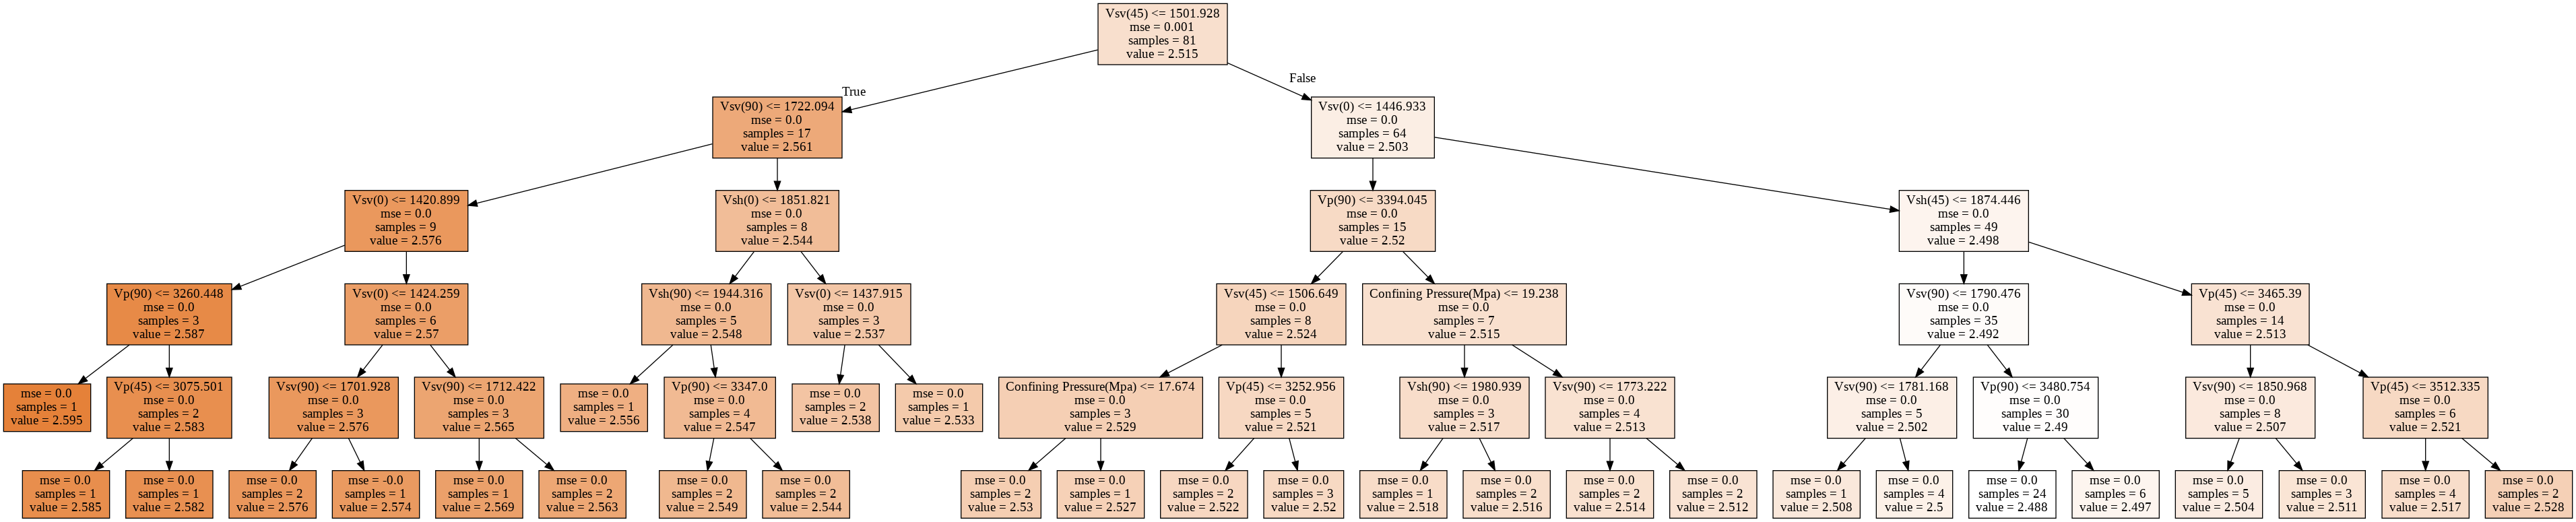

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.0009019043317595615
0.9989605724988909
0.008395981998474878
0.9219467612121012


***Prediction of E3 vertical Yong's Madulus (Mpa)***	

In [ ]:
X_3 = df_updated_3[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_3 = df_updated_3["E3 vertical Yong's Madulus (Mpa)"]

In [ ]:
x = sm.add_constant(X_3)
result = sm.OLS(y_3,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     E3 vertical Yong's Madulus (Mpa)   R-squared:                       1.000
Model:                                          OLS   Adj. R-squared:                  1.000
Method:                               Least Squares   F-statistic:                 1.181e+05
Date:                              Mon, 29 Mar 2021   Prob (F-statistic):          1.56e-182
Time:                                      07:33:15   Log-Likelihood:                 596.32
No. Observations:                               102   AIC:                            -1171.
Df Residuals:                                    91   BIC:                            -1142.
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -7.8623     28.097     -0.280      0.780     -63.674      47.949
Confining Pressure(Mpa)    -0.2052      0.040     -5.189      0.000      -0.284      -0.127
Vp(90)                     -0.0091      0.011     -0.794      0.429      -0.032       0.014
Vp(45)                     -0.0004      0.003     -0.149      0.882      -0.006       0.005
Vp(0)                       0.0041      0.000      8.301      0.000       0.003       0.005
Vsh(90)                     0.0298      0.006      4.660      0.000       0.017       0.043
Vsh(45)                     0.0298      0.023      1.270      0.207      -0.017       0.076
Vsh(0)                     -0.0111      0.006     -1.801      0.075      -0.023       0.001
Vsv(90)                    -0.0331      0.022     -1.510      0.135      -0.077       0.010
Vsv(45)                 -3.571e-05   5.37e-06     -6.649      0.000   -4.64e-05    -2.5e-05
Vsv(0)                      0.0001   1.59e-05      7.365      0.000    8.53e-05       0.000
==============================================================================
Omnibus:                       37.522   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.503
Skew:                          -1.241   Prob(JB):                     8.30e-26
Kurtosis:                       7.585   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.019551217532240386
0.9356960444539039
0.02610657738519074
0.9124557583864699


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.021238370969852417
0.9241190992372456
0.028227100433805916
0.8976565049455837


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.0019890510705147134
0.9993344480790767
0.005504264899749745
0.9961084164354611


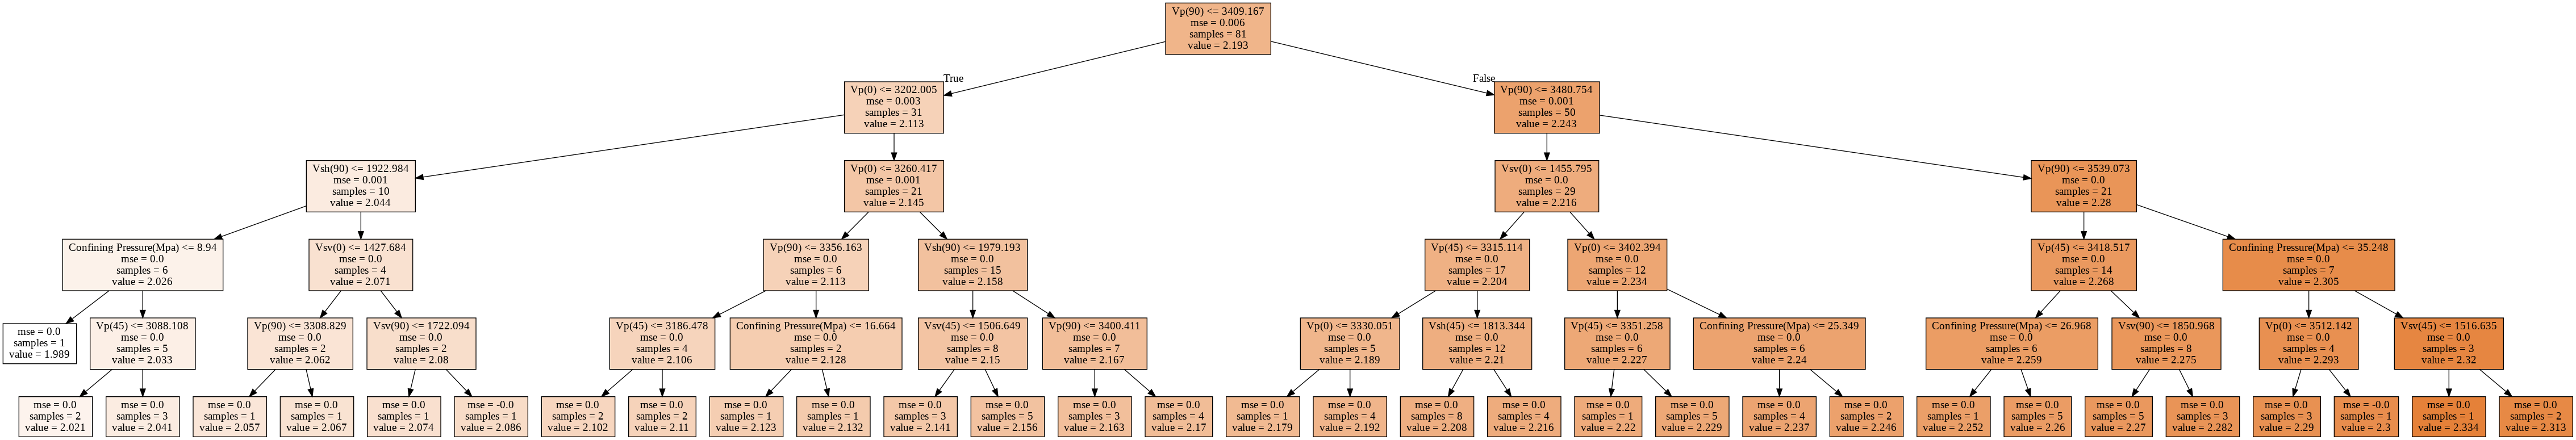

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.003675357411548218
0.9977275767179093
0.013339390061536505
0.9771440303166445


***Prediction of V31 (Poisson's ratio parameter)***

In [ ]:
X_4 = df_updated_4[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_4 = df_updated_4['V31']

In [ ]:
x = sm.add_constant(X_4)
result = sm.OLS(y_4,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    V31   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.452e+05
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          9.95e-204
Time:                        07:43:20   Log-Likelihood:                 777.37
No. Observations:                 102   AIC:                            -1533.
Df Residuals:                      91   BIC:                            -1504.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8589      4.762     -0.390      0.697     -11.318       7.600
Confining Pressure(Mpa)    -0.0357      0.007     -5.327      0.000      -0.049      -0.022
Vp(90)                     -0.0021      0.002     -1.081      0.283      -0.006       0.002
Vp(45)                      0.0011      0.000      2.326      0.022       0.000       0.002
Vp(0)                   -9.547e-05   8.38e-05     -1.139      0.258      -0.000     7.1e-05
Vsh(90)                     0.0054      0.001      4.960      0.000       0.003       0.008
Vsh(45)                     0.0050      0.004      1.246      0.216      -0.003       0.013
Vsh(0)                     -0.0008      0.001     -0.777      0.439      -0.003       0.001
Vsv(90)                    -0.0064      0.004     -1.721      0.089      -0.014       0.001
Vsv(45)                 -6.829e-06    9.1e-07     -7.503      0.000   -8.64e-06   -5.02e-06
Vsv(0)                   1.678e-05   2.69e-06      6.246      0.000    1.14e-05    2.21e-05
==============================================================================
Omnibus:                       53.139   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.436
Skew:                          -1.560   Prob(JB):                     1.57e-65
Kurtosis:                      10.777   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.006090502572195198
0.9256897205055024
0.00782244905306316
0.9065477939946699


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.006456702008749741
0.9164850704127321
0.008261136141734517
0.8957721859096963


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.000609267763247386
0.9992563663516613
0.0016808348366875515
0.9956852647551419


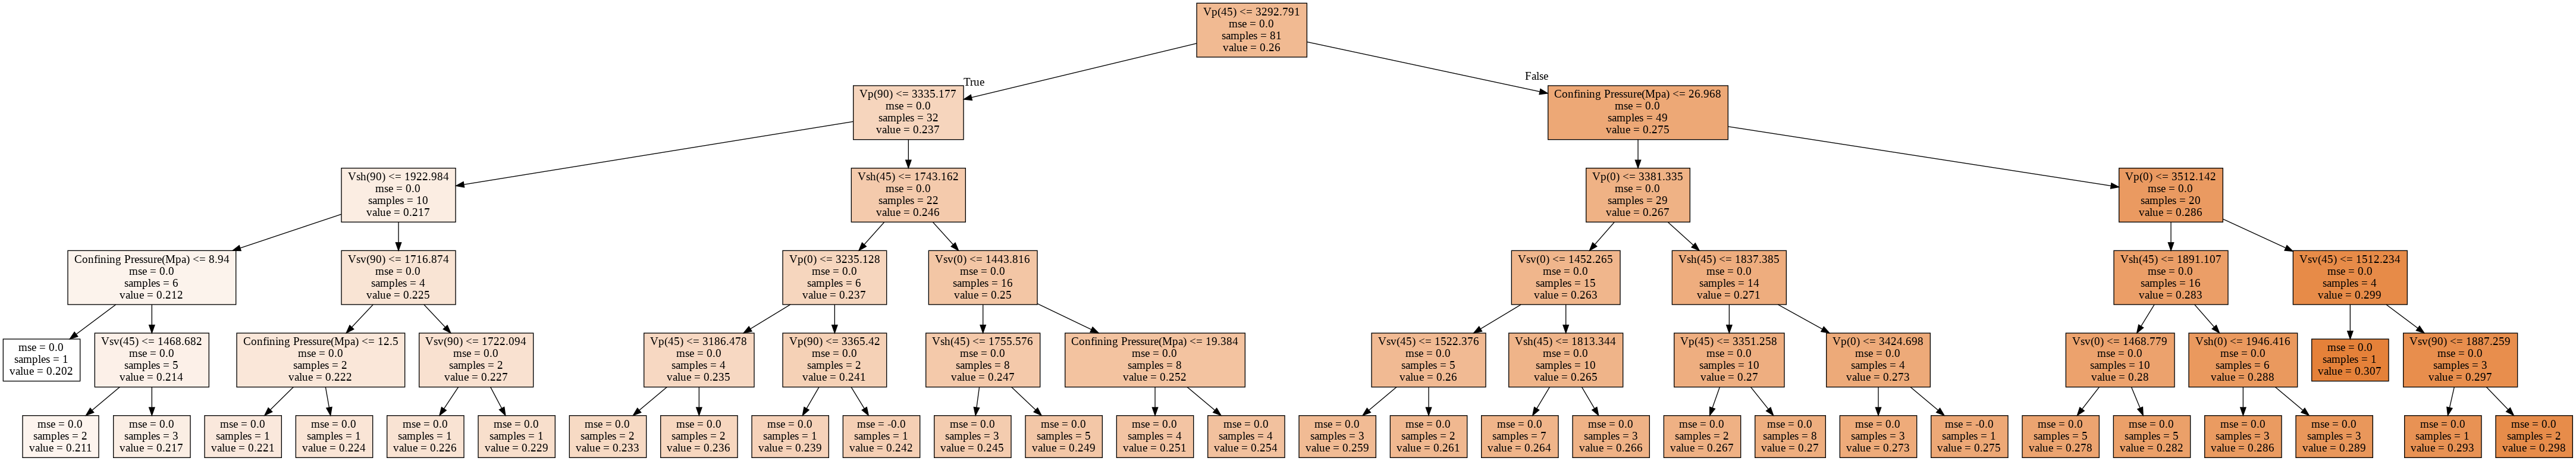

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.0011826275275701817
0.9971981905209519
0.0037550493870816006
0.9784654709866824


***Prediction of V12 (Poisson's ratio parameter)***

In [ ]:
X_5 = df_updated_5[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_5 = df_updated_5['V12']

In [ ]:
x = sm.add_constant(X_5)
result = sm.OLS(y_5,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    V12   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.686e+05
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          5.01e-205
Time:                        07:46:52   Log-Likelihood:                 789.56
No. Observations:                 102   AIC:                            -1557.
Df Residuals:                      91   BIC:                            -1528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.1807      4.226     -0.279      0.781      -9.574       7.213
Confining Pressure(Mpa)    -0.0312      0.006     -5.248      0.000      -0.043      -0.019
Vp(90)                     -0.0008      0.002     -0.449      0.654      -0.004       0.003
Vp(45)                     -0.0004      0.000     -0.977      0.331      -0.001       0.000
Vp(0)                       0.0004   7.43e-05      5.652      0.000       0.000       0.001
Vsh(90)                     0.0038      0.001      3.953      0.000       0.002       0.006
Vsh(45)                     0.0044      0.004      1.254      0.213      -0.003       0.011
Vsh(0)                     -0.0012      0.001     -1.268      0.208      -0.003       0.001
Vsv(90)                    -0.0049      0.003     -1.473      0.144      -0.011       0.002
Vsv(45)                 -5.864e-06   8.08e-07     -7.261      0.000   -7.47e-06   -4.26e-06
Vsv(0)                   1.636e-05   2.38e-06      6.864      0.000    1.16e-05    2.11e-05
==============================================================================
Omnibus:                       48.083   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.421
Skew:                          -1.451   Prob(JB):                     1.85e-49
Kurtosis:                       9.662   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_5, y_5, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.005801138766446095
0.9206536522578477
0.006588741604555292
0.9192212245446315


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.0067338081052757655
0.8930891198145082
0.006714964884090905
0.9160965525987882


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.0005651263915232367
0.9992470058333394
0.0013374885667117237
0.9966713167543859


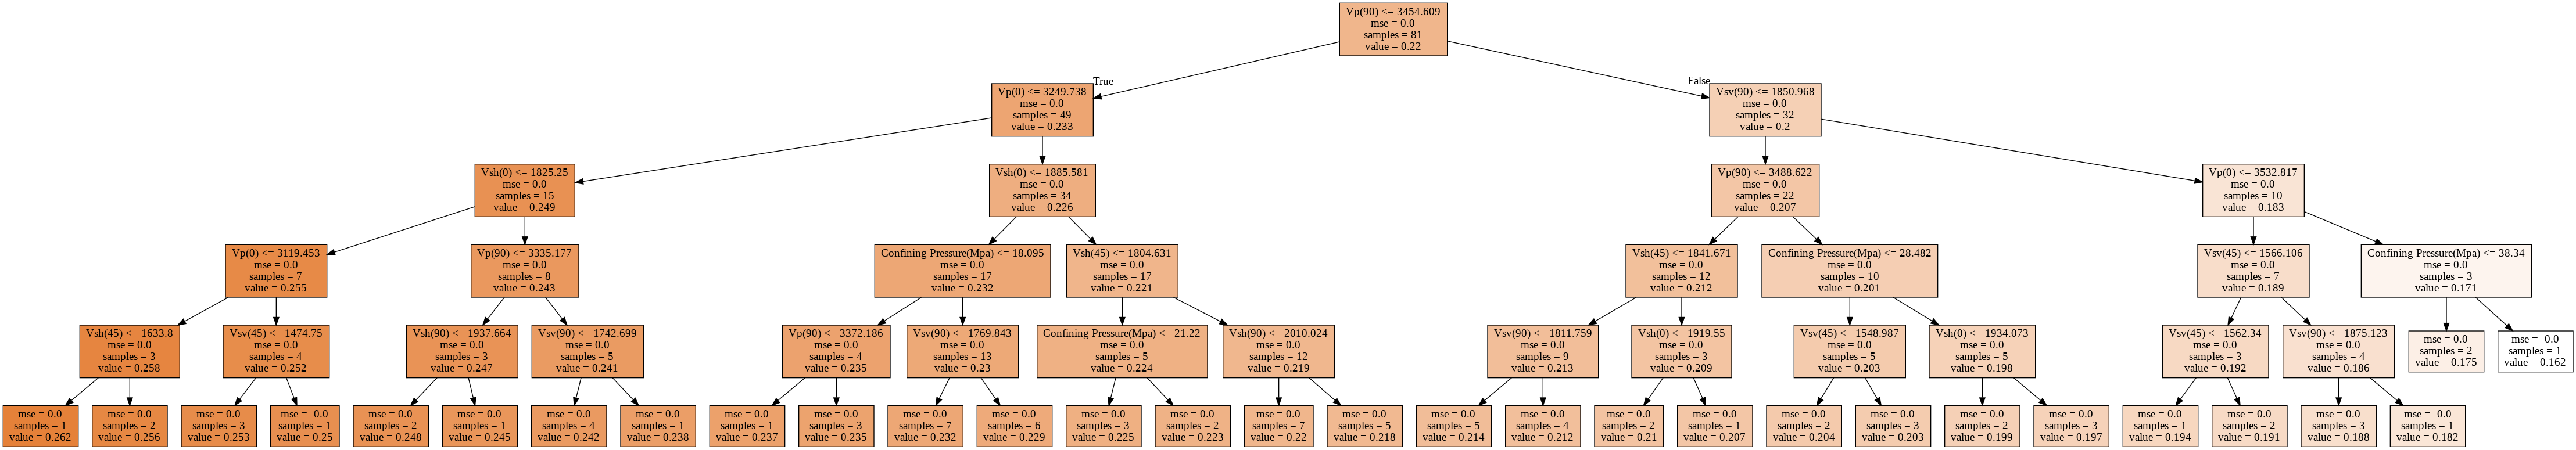

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.0012768523558878994
0.9961560140005398
0.002680721563728003
0.986628019664015


***Prediction of V13 (Poisson's ratio parameter)***

In [ ]:
X_6 = df_updated_6[['Confining Pressure(Mpa)', 'Vp(90)', 'Vp(45)', 'Vp(0)', 'Vsh(90)', 'Vsh(45)', 'Vsh(0)', 'Vsv(90)', 'Vsv(45)', 'Vsv(0)']]
y_6 = df_updated_6['V13']

In [ ]:
x = sm.add_constant(X_6)
result = sm.OLS(y_6,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    V13   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.192e+05
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          8.60e-212
Time:                        07:50:14   Log-Likelihood:                 789.48
No. Observations:                 102   AIC:                            -1557.
Df Residuals:                      91   BIC:                            -1528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.8686      4.229     -0.678      0.499     -11.269       5.532
Confining Pressure(Mpa)    -0.0299      0.006     -5.021      0.000      -0.042      -0.018
Vp(90)                     -0.0016      0.002     -0.947      0.346      -0.005       0.002
Vp(45)                      0.0011      0.000      2.521      0.013       0.000       0.002
Vp(0)                      -0.0006   7.44e-05     -7.933      0.000      -0.001      -0.000
Vsh(90)                     0.0047      0.001      4.857      0.000       0.003       0.007
Vsh(45)                     0.0039      0.004      1.097      0.276      -0.003       0.011
Vsh(0)                      0.0007      0.001      0.703      0.484      -0.001       0.003
Vsv(90)                    -0.0055      0.003     -1.652      0.102      -0.012       0.001
Vsv(45)                 -6.421e-06   8.08e-07     -7.944      0.000   -8.03e-06   -4.82e-06
Vsv(0)                   9.907e-06   2.39e-06      4.152      0.000    5.17e-06    1.46e-05
==============================================================================
Omnibus:                       58.920   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.529
Skew:                          -1.700   Prob(JB):                     7.85e-87
Kurtosis:                      12.041   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(81, 10)
(21, 10)


In [ ]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [ ]:
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

0.006669639100539943
0.9249864468493697
0.008190601404839895
0.9134814658680197


In [ ]:
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

0.007477455092660759
0.9057149805590976
0.008929142327634174
0.8971753924390675


In [ ]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

0.000657997097334585
0.9992698988649972
0.0017667917730942516
0.9959742360522486


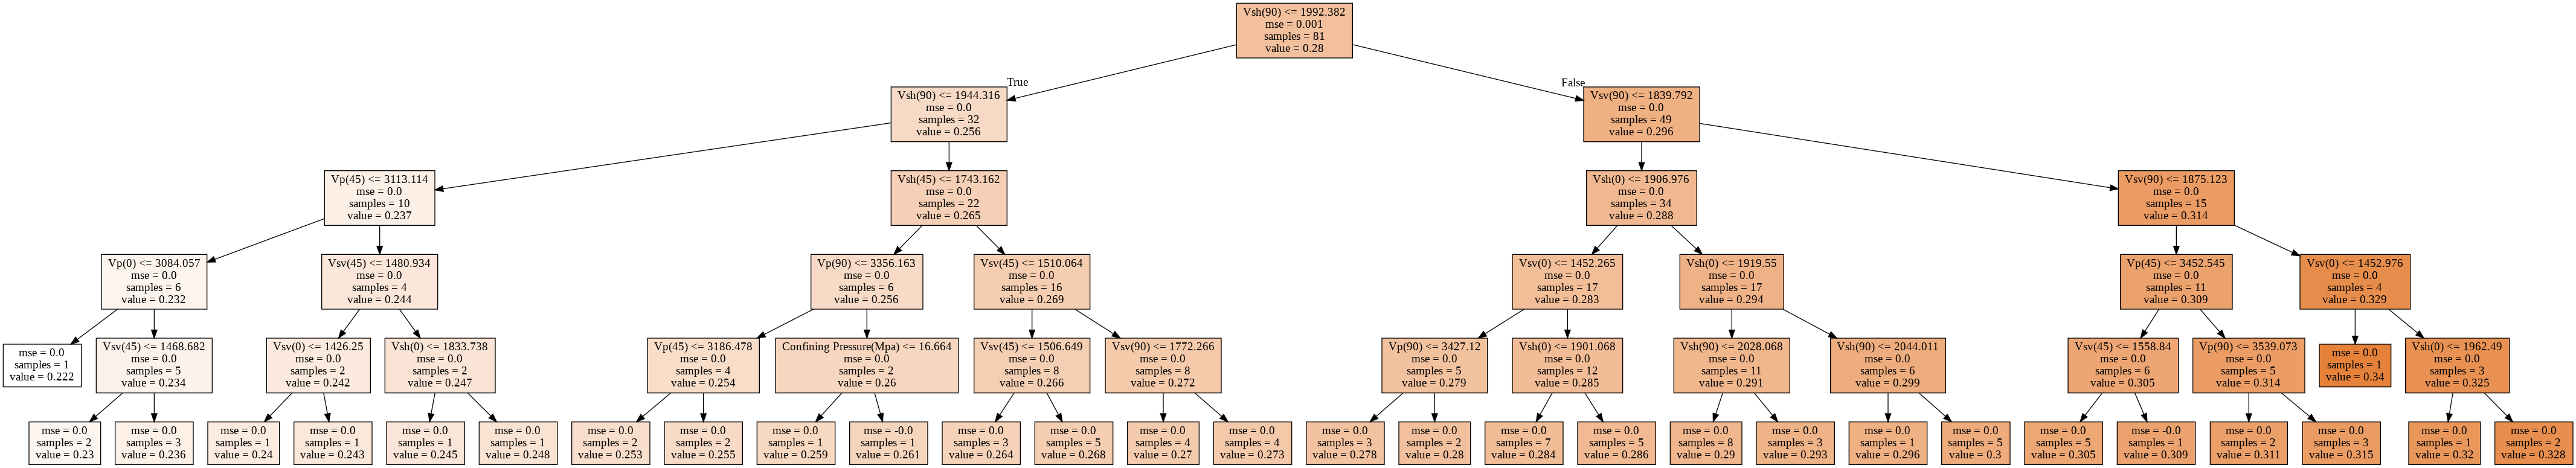

In [ ]:
dot_data = tree.export_graphviz(dtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.0014179274325294001
0.9966096613728224
0.0038259633981869785
0.9811218604778138


# **!Results!**

The R2 score value for K (Bulk Modulus) Mpa is 0.996307

The R2 score value for E1 Horizontal Young Modulus (Mpa) is 0.805965

The R2 score value for E3 Vertical Young Modulus (Mpa) is 0.996108

The R2 score value for V31 (Poisson's ratio parameter) is 0.995685

The R2 score value for V12 (Poisson's ratio parameter) is 0.996671

The R2 score value for V13 (Poisson's ratio parameter) is 0.995974